In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def hot_start():
    lattice = np.random.random_integers(0,1,(ns,ns))
    lattice[lattice==0] = -1
    return lattice

def cold_start():
    lattice = np.ones((ns,ns))
    return lattice    

def bc(i):
    if i> ns-1:
        return 0
    if i< 0:
        return ns-1
    else:
        return i
    
def mag(lattice):
    m = 0
    for j in range(0,ns):
        for k in range(0,ns):
            m += lattice[j,k]
    return m/(ns*ns) 

def energy(lattice, N, M):
    return -1*lattice[N,M]*(lattice[bc(N-1), M] + lattice[bc(N+1), M] + lattice[N, bc(M-1)] + lattice[N, bc(M+1)])

def sum_nn(lattice, N, M):
    return (lattice[bc(N-1), M] + lattice[bc(N+1), M] + lattice[N, bc(M-1)] + lattice[N, bc(M+1)])

def update(beta):
    #lattice = hot_start()
    for step in enumerate(range(ns*ns)):
        j = np.random.randint(0,ns)
        k = np.random.randint(0,ns)
        E = -2.*energy(lattice, N, M)
        if E <= 0:
            lattice[j,k] *= -1
        elif np.exp(-beta*E) > np.random.rand():
            lattice[j,k] *= -1
            
def sweep(lattice, beta):
    acc = 0
    for j in range(0, ns):
        for k in range(0,ns):
            sum_nn = lattice[bc(j-1),k] + lattice[bc(j+1),k] + lattice[j,bc(k-1)] + lattice[j,bc(k+1)]
            new_spin = -lattice[j,k]
            dE = -1*(new_spin-lattice[j,k])*sum_nn
            if dE <= 0. :
                lattice[j,k] = new_spin
                acc += 1
            elif np.exp(-beta*dE) > np.random.rand():
                lattice[j,k] = new_spin
                acc += 1
    accept = (1. * acc) / (ns*ns)
    #print("Acceptance :", accept)                          

Size =  25
Initial Sweeps =  10
Sweeps =  250
beta =  0.4
Average m :  -0.00437760000000014


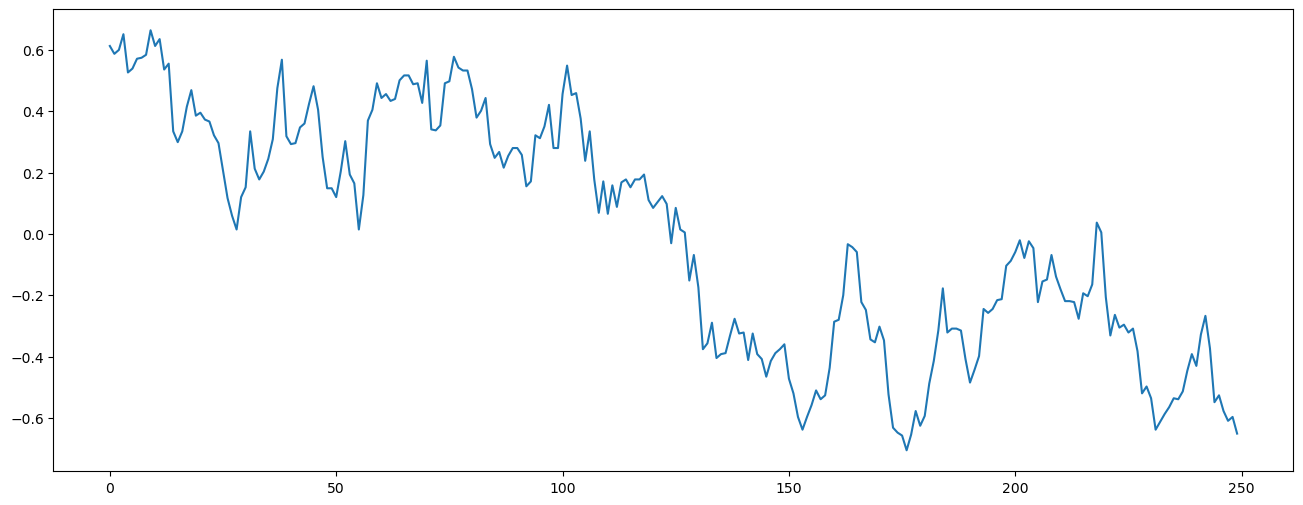

In [3]:
ns = 25
ninit = 10
nsweeps = 250
beta = 0.4

print("Size = ", ns)
print("Initial Sweeps = ", ninit)
print("Sweeps = ", nsweeps)
print("beta = ",beta)
accept = 0.0
lattice = cold_start()
for n in range(ninit):
    sweep(lattice, beta)
    #update(beta)
    m = mag(lattice)
    #print("Sweep : ",n, "Mag = ", m)
    
m = mag(lattice)

mav = 0
mlist = np.ones(nsweeps)

for n in range(nsweeps):
    sweep(lattice, beta)
    #update(beta)
    m = mag(lattice)
    mav += m
    mlist[n] = m
    #print("Sweep : ", n, "Mag = ",m)
    
mav = mav / nsweeps
print("Average m : ", mav)
plt.figure(figsize=(16,6))
plt.plot(mlist)
plt.show()  

Size =  25
Initial Sweeps =  10
Sweeps =  250
beta =  0.441
Average m :  -0.042867199999999994


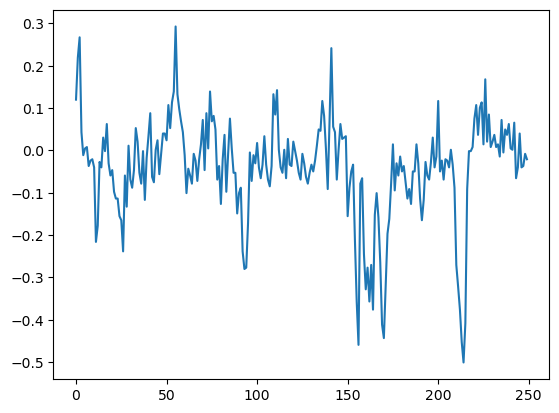

In [10]:
ns = 25
ninit = 10
nsweeps = 250
beta = 0.441
N,M=5,5
print("Size = ", ns)
print("Initial Sweeps = ", ninit)
print("Sweeps = ", nsweeps)
print("beta = ",beta)
accept = 0.0
lattice = cold_start()
for n in range(ninit):
    sweep(lattice, beta)
    update(beta)
    m = mag(lattice)
    #print("Sweep : ",n, "Mag = ", m)
    
m = mag(lattice)

mav = 0
mlist = np.ones(nsweeps)

for n in range(nsweeps):
    sweep(lattice, beta)
    update(beta)
    m = mag(lattice)
    mav += m
    mlist[n] = m
    #print("Sweep : ", n, "Mag = ",m)
    
mav = mav / nsweeps
print("Average m : ", mav)
plt.plot(mlist)
plt.show()                           

In [7]:
# ising.py
# Simulates the two-dimensional Ising model using the Metropolis algorithm
# By Dan Schroeder, Weber State University, January 2013

import tkinter as tk  # Updated to tkinter for Python 3
import numpy as np
import random
import math

size = 20                           # number of sites in a lattice row (change if desired)
squareWidth = 20                    # width of one site in pixels (change if desired)
canvasWidth = size * squareWidth    # full width of canvas in pixels
s = np.ones((size, size), int)      # 2D array of dipoles (1=up, -1=down)
running = False                     # will be true when simulation is running

theWindow = tk.Tk()                 # create the GUI window
theWindow.title("Ising Model")
theWindow.geometry('+50+50')        # get the window away from the corner

# Here's the Canvas where we draw the lattice using a tkinter PhotoImage:
theCanvas = tk.Canvas(theWindow, width=canvasWidth, height=canvasWidth)
theCanvas.pack()                    # put it at the top of the window
theImage = tk.PhotoImage(width=canvasWidth, height=canvasWidth)
theCanvas.create_image((3, 3), image=theImage, anchor="nw", state="normal")
# The coordinates (3, 3) are a kludge to eliminate a mysterious offset that occurs otherwise.

# Function called when Start/Stop button is pressed:
def startStop():
    global running
    running = not running
    if running:
        goButton.config(text="Pause")
    else:
        goButton.config(text="Resume")

# Create the GUI controls:
controlFrame = tk.Frame(theWindow)        # a frame to hold the GUI controls
controlFrame.pack()                       # put it below the canvas
tLabel = tk.Label(controlFrame, text="Temperature: ")
tLabel.pack(side="left")
tSlider = tk.Scale(controlFrame, from_=0.01, to=10.0, resolution=0.01, length=120, orient="horizontal")
tSlider.pack(side="left")
tSlider.set(2.27)                         # set to critical temperature initially
spacer = tk.Frame(controlFrame, width=40)
spacer.pack(side="left")
goButton = tk.Button(controlFrame, text="Start", width=8, command=startStop)
goButton.pack(side="left")

# Function to color the square representing site (i,j):
def colorSquare(i, j):
    theColor = "#7000ff" if s[i, j] == 1 else "#ffffff"    # purple and white
    theImage.put(theColor, to=(i * squareWidth, j * squareWidth, 
                               (i + 1) * squareWidth, (j + 1) * squareWidth))
    # the "put" function colors the indicated rectangle within the image

# Function to calculate energy change upon hypothetical flip (with pbc):
def deltaE(i, j):
    leftS = s[size - 1, j] if i == 0 else s[i - 1, j]
    rightS = s[0, j] if i == size - 1 else s[i + 1, j]
    topS = s[i, size - 1] if j == 0 else s[i, j - 1]
    bottomS = s[i, 0] if j == size - 1 else s[i, j + 1]
    return 2.0 * s[i, j] * (leftS + rightS + topS + bottomS)

# Main simulation "loop" schedules a call to itself upon completion:
def simulate():
    if running:
        T = tSlider.get()                    # get the current temperature
        for step in range(1000):             # (change the number of steps as desired)
            i = int(random.random() * size)  # choose a random row and column
            j = int(random.random() * size)
            eDiff = deltaE(i, j)
            if eDiff <= 0 or random.random() < math.exp(-eDiff / T):  # Metropolis!
                s[i, j] = -s[i, j]
                colorSquare(i, j)
    theWindow.after(1, simulate)             # come back in one millisecond

# Initialize to a random array, and draw it as we go:
for i in range(size):
    for j in range(size):
        s[i, j] = 1 if random.random() < 0.5 else -1
        colorSquare(i, j)

simulate()                # start the simulation!
theWindow.mainloop()      # start the GUI event loop